In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multigrid import BVP, BVPSolver

In [2]:
def relax_left(sol, src, s, h):
    return sol[1] - src[0]*h**2/6

def relax_middle(sol, src, s, h, i):
    return (
        + sol[i + 1]*(1 + h/s)
        + sol[i - 1]*(1 - h/s)
        - src[i]*h**2
    )/2

def relax_right(sol, src, s, h):
    return 0

def residual_left(sol, src, s, h):
    return -(relax_left(sol, src, s, h) - sol[0])*6/h**2

def residual_middle(sol, src, s, h, i):
    return -(relax_middle(sol, src, s, h, i) - sol[i])*2/h**2

def residual_right(sol, src, s, h):
    return 0

In [3]:
r_s = 8
rho_c = 1.28e-3

def src(s):
    if s < 0.5:
        rho = rho_c*(1 - (s / (1 - s))**2)
        return 4*np.pi*rho*r_s**2*(1 - s)**(-4)
    else:
        return 0

def exact_sol(s):
    if s < 0.5:
        a = s/(1 - s)
        return -2*np.pi*rho_c*r_s**2*(1/2 - a**2/3 + a**4/10)
    else:
        return -8/15*np.pi*rho_c*r_s**2*(1 - s)/s

In [4]:
s1 = 0
s2 = 1
bvp = BVP(s1, s2, relax_left, relax_middle, relax_right, residual_left, residual_middle, residual_right, src, exact_sol_func=exact_sol)
n = 9
solver = BVPSolver(bvp, n=n)

In [5]:
# phi_exact = phi_exact_func(r_func(phi.x, r_s), r_s, rho_c)
i = 0
phi = None
while True:
    i += 1
    solver.solve()
    res_rms = solver.residual().rms()
    print(i, res_rms, solver.exact_error().rms())
    if res_rms < 1e-11:
        break

1 11.963711284295753 0.009469036123790622
2 1.4412897490427579 0.006903064422200395
3 1.2178581759488014 0.001484296500577829
4 0.32076709165048356 0.00018928645667105453
5 0.04021264461977098 0.0003784031800162114
6 0.03190684980438353 0.0003508739950925258
7 0.00795808515708838 0.00033890353608418506
8 0.0022940168726719844 0.00033625315625706816
9 0.0008664614738055733 0.00033621438384994325
10 0.0002458720614897614 0.00033623718324048125
11 7.838194120906303e-05 0.000336264934412672
12 2.5264260726558423e-05 0.0003362651612158671
13 7.740578183806671e-06 0.0003362662319226498
14 2.4580040086316364e-06 0.000336265877453486
15 7.693272374334446e-07 0.0003362659415522003
16 2.4112616172923977e-07 0.00033626590907908207
17 7.600556012964131e-08 0.0003362659175947759
18 2.3831805796337296e-08 0.00033626591490640154
19 7.482331342814232e-09 0.00033626591574105447
20 2.3317320198937955e-09 0.00033626591556866573
21 7.22510120375621e-10 0.0003362659156207214
22 2.0262014098771134e-10 0.000

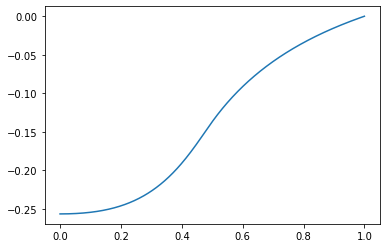

In [6]:
plt.plot(solver.sol_grid.x, solver.sol_grid.val)